# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [304]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [92]:
import pandas as pd
import numpy as np 

# FIRST Load the energy data from the file assets/Energy Indicators.xls, put into a DataFrame 
# with the variable name of Energy.
Energy = pd.read_excel("assets/Energy Indicators.xls")
# las dos primeras colummnas no continen información importante, por lo que se elimnan
Energy.drop(columns=Energy.columns[0:2], inplace = True)
# Se nombran las columnas en función de lo especificado
Energy.rename(columns={Energy.columns[0]: 'Country',
                       Energy.columns[1]: 'Energy Supply',
                       Energy.columns[2]: 'Energy Supply per Capita',
                       Energy.columns[3]:  '% Renewable'}, inplace = True)
#Se requiere limpiar la tabla con la región exterior de la misma, así como eliminar la primera columna
Energy.dropna(inplace = True)
Energy.reset_index(inplace = True, drop = True)
Energy.drop(index=0, inplace = True)

In [93]:
# Se realizan cambios en la tabla cambiando los valores '...' por np.nan, así como el cálculo de la energía
# en Kilojoules
Energy.replace('...', np.nan, inplace = True)
Energy['Energy Supply'] = Energy['Energy Supply']*1000000

In [95]:
# Se hace una correción en las celdas de nombres quitando parentesis y valores númericos en la lista
Energy['Country'] = Energy['Country'].str.replace('\d+', '', regex=True)
Energy['Country'] = Energy['Country'].str.replace(r'\s\(.*\)',"", regex=True)
# Cambio de nombres especificados en la lista
Energy.replace(["Republic of Korea","United States of America","United Kingdom of Great Britain and Northern Ireland",
                "China, Hong Kong Special Administrative Region", 'China'],
               ["South Korea","United States","United Kingdom","Hong Kong"], inplace = True)

In [98]:
# Fragmento del Dataframe para verificar que la base de datos se encuentra en estado deseable
Energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
1,Andorra,9.000000e+06,121.0,88.695650
2,Afghanistan,3.210000e+08,10.0,78.669280
3,Albania,1.020000e+08,35.0,100.000000
4,Algeria,1.959000e+09,51.0,0.551010
5,American Samoa,NaN,NaN,0.641026


In [110]:
# cargar los datos del PIB desde el archivo
GPD = pd.read_csv('assets/world_bank.csv', header= 4)
# Cambiamos estos datos de nombre de ciertos países
GPD.replace({"Korea, Rep.": "South Korea", 
             "Iran, Islamic Rep.": "Iran",
             "Hong Kong SAR, China": "Hong Kong"}, inplace =  True)

In [114]:
GPD.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [113]:
# Cargar los datos de la revista Sciamgo y la clasificación por países de la 
# ingeniería energética y la tecnología de la energía
ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')

In [115]:
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [121]:
# ponemos el nombre de los paises como index para poder unir las tablas en una sola
ScimEn.set_index('Country', inplace  = True)
GPD.set_index('Country Name', inplace  = True)
Energy.set_index('Country', inplace  = True)

KeyError: "None of ['Country'] are in the columns"

In [130]:
# Unir los tres conjuntos de datos: PIB, Energía y ScimEn en un nuevo conjunto de datos 
# (utilizando la intersección de los nombres de los países).
df1 = pd.merge(ScimEn, Energy, how='outer', left_index=True, right_index=True)
df2 = pd.merge(df1, GPD.iloc[:,-10:], how='outer', left_index=True, right_index=True)

In [146]:
# Ordenar la tabla en función del RANK 
df_sort = df2.sort_values('Rank')

In [160]:
df_sort.iloc[0:15]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10.0,11983.0,11923.0,114675.0,22595.0,9.57,104.0,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [161]:
def answer_one():
    import pandas as pd
    import numpy as np 
    # FIRST Load the energy data from the file assets/Energy Indicators.xls, put into a DataFrame 
    # with the variable name of Energy.
    Energy = pd.read_excel("assets/Energy Indicators.xls")
    # las dos primeras colummnas no continen información importante, por lo que se elimnan
    Energy.drop(columns=Energy.columns[0:2], inplace = True)
    # Se nombran las columnas en función de lo especificado
    Energy.rename(columns={Energy.columns[0]: 'Country',
                           Energy.columns[1]: 'Energy Supply',
                           Energy.columns[2]: 'Energy Supply per Capita',
                           Energy.columns[3]:  '% Renewable'}, inplace = True)
    #Se requiere limpiar la tabla con la región exterior de la misma, así como eliminar la primera columna
    Energy.dropna(inplace = True)
    Energy.reset_index(inplace = True, drop = True)
    Energy.drop(index=0, inplace = True)
    
    # Se realizan cambios en la tabla cambiando los valores '...' por np.nan, así como el cálculo de la energía
    # en Kilojoules
    Energy.replace('...', np.nan, inplace = True)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000    
    # Se hace una correción en las celdas de nombres quitando parentesis y valores númericos en la lista
    Energy['Country'] = Energy['Country'].str.replace('\d+', '', regex=True)
    Energy['Country'] = Energy['Country'].str.replace(r'\s\(.*\)',"", regex=True)
    # Cambio de nombres especificados en la lista
    Energy.replace(["Republic of Korea","United States of America","United Kingdom of Great Britain and Northern Ireland",
                    "China, Hong Kong Special Administrative Region"],
                   ["South Korea","United States","United Kingdom","Hong Kong"], inplace = True)
    # cargar los datos del PIB desde el archivo
    GPD = pd.read_csv('assets/world_bank.csv', header= 4)
    # Cambiamos estos datos de nombre de ciertos países
    GPD.replace({"Korea, Rep.": "South Korea", 
                 "Iran, Islamic Rep.": "Iran",
                 "Hong Kong SAR, China": "Hong Kong"}, inplace =  True)
    # Cargar los datos de la revista Sciamgo y la clasificación por países de la 
    # ingeniería energética y la tecnología de la energía
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    # ponemos el nombre de los paises como index para poder unir las tablas en una sola
    ScimEn.set_index('Country', inplace  = True)
    GPD.set_index('Country Name', inplace  = True)
    Energy.set_index('Country', inplace  = True)
    # Unir los tres conjuntos de datos: PIB, Energía y ScimEn en un nuevo conjunto de datos 
    # (utilizando la intersección de los nombres de los países).
    df1 = pd.merge(ScimEn, Energy, how='outer', left_index=True, right_index=True)
    df2 = pd.merge(df1, GPD.iloc[:,-10:], how='outer', left_index=True, right_index=True)
    
    # Ordenar la tabla en función del RANK 
    df_sort = df2.sort_values('Rank')
    return df_sort.iloc[0:15]
    raise NotImplementedError()

In [162]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [ ]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [163]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [209]:
def answer_two():
    import pandas as pd
    import numpy as np 
    # FIRST Load the energy data from the file assets/Energy Indicators.xls, put into a DataFrame 
    # with the variable name of Energy.
    Energy = pd.read_excel("assets/Energy Indicators.xls")
    # las dos primeras colummnas no continen información importante, por lo que se elimnan
    Energy.drop(columns=Energy.columns[0:2], inplace = True)
    # Se nombran las columnas en función de lo especificado
    Energy.rename(columns={Energy.columns[0]: 'Country',
                           Energy.columns[1]: 'Energy Supply',
                           Energy.columns[2]: 'Energy Supply per Capita',
                           Energy.columns[3]:  '% Renewable'}, inplace = True)
    #Se requiere limpiar la tabla con la región exterior de la misma, así como eliminar la primera columna
    Energy.dropna(inplace = True)
    Energy.reset_index(inplace = True, drop = True)
    Energy.drop(index=0, inplace = True)
    
    # Se realizan cambios en la tabla cambiando los valores '...' por np.nan, así como el cálculo de la energía
    # en Kilojoules
    Energy.replace('...', np.nan, inplace = True)
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000    
    # Se hace una correción en las celdas de nombres quitando parentesis y valores númericos en la lista
    Energy['Country'] = Energy['Country'].str.replace('\d+', '', regex=True)
    Energy['Country'] = Energy['Country'].str.replace(r'\s\(.*\)',"", regex=True)
    # Cambio de nombres especificados en la lista
    Energy.replace(["Republic of Korea","United States of America","United Kingdom of Great Britain and Northern Ireland",
                    "China, Hong Kong Special Administrative Region"],
                   ["South Korea","United States","United Kingdom","Hong Kong"], inplace = True)
    # cargar los datos del PIB desde el archivo
    GPD = pd.read_csv('assets/world_bank.csv', header= 4)
    # Cambiamos estos datos de nombre de ciertos países
    GPD.replace({"Korea, Rep.": "South Korea", 
                 "Iran, Islamic Rep.": "Iran",
                 "Hong Kong SAR, China": "Hong Kong"}, inplace =  True)
    # Cargar los datos de la revista Sciamgo y la clasificación por países de la 
    # ingeniería energética y la tecnología de la energía
    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')

    GPD.rename(columns={'Country Name': 'Country'}, inplace=True)
    union = pd.merge(pd.merge(Energy, GPD, on='Country', how='outer'), ScimEn, on='Country', how='outer')
    intersect = pd.merge(pd.merge(Energy, GPD, on='Country'), ScimEn, on='Country')
    diff = len(union)-len(intersect)
    return diff
    raise NotImplementedError()

In [210]:
answer_two()

158

In [169]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [273]:
df = answer_one()
columnas = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
df['avgGDP'] = df[columnas].apply(lambda x: np.nanmean(x), axis = 1).sort_values(ascending =  False)

In [274]:
df['avgGDP']

China                 6.348609e+12
United States         1.536434e+13
Japan                 5.542208e+12
United Kingdom        2.487907e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
Germany               3.493025e+12
India                 1.769297e+12
France                2.681725e+12
South Korea           1.106715e+12
Italy                 2.120175e+12
Spain                 1.418078e+12
Iran                  4.441558e+11
Australia             1.164043e+12
Brazil                2.189794e+12
Name: avgGDP, dtype: float64

In [271]:
def answer_three():
    df = answer_one()
    columnas = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
    df['avgGDP'] = df[columnas].apply(lambda x: np.nanmean(x), axis = 1).sort_values(ascending =  False)
    return df['avgGDP']
    raise NotImplementedError()

In [272]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [221]:
Top15 = answer_one()
AvgGDP = answer_three()
key = AvgGDP.index[5]
final = Top15.loc[key,'2015']
initial = Top15.loc[key,'2006']

2666333396477.13

In [222]:
def answer_four():
    Top15 = answer_one()
    AvgGDP = answer_three()
    key = AvgGDP.index[5]
    final = Top15.loc[key,'2015']
    initial = Top15.loc[key,'2006']
    return abs(final - initial)
    raise NotImplementedError()

In [318]:
answer_four()

228139911279.3601

In [ ]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [226]:
df = answer_one()
df['Energy Supply per Capita'].mean()

157.6

In [227]:
def answer_five():
    df = answer_one()
    return df['Energy Supply per Capita'].mean()
    raise NotImplementedError()

In [ ]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [233]:
df = answer_one()
ndf = df.sort_values('% Renewable', ascending=False)
ndf.index[0], ndf['% Renewable'][0]

69.64803

In [234]:
def answer_six():
    df = answer_one()
    ndf = df.sort_values('% Renewable', ascending=False)
    return ndf.index[0], ndf['% Renewable'][0]
    raise NotImplementedError()

In [235]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [238]:
df = answer_one()
df["Ratio"] = df["Self-citations"] / df["Citations"]
ndf = df.sort_values('Ratio', ascending=False)
print(ndf.index[0], ndf['Ratio'][0])

China 0.6893126179389422


In [239]:
def answer_seven():
    df = answer_one()
    df["Ratio"] = df["Self-citations"] / df["Citations"]
    ndf = df.sort_values('Ratio', ascending=False)
    return ndf.index[0], ndf['Ratio'][0]
    raise NotImplementedError()

In [240]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [247]:
df = answer_one()
population = df['Energy Supply']/df['Energy Supply per Capita']
pop_sort = population.sort_values(ascending = False)
pop_sort.index[2]

'United States'

In [248]:
def answer_eight():
    df = answer_one()
    population = df['Energy Supply']/df['Energy Supply per Capita']
    pop_sort = population.sort_values(ascending = False)
    return pop_sort.index[2]
    raise NotImplementedError()

In [249]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [253]:
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

0.7940010435442942

In [254]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    return Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
    raise NotImplementedError()

In [250]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

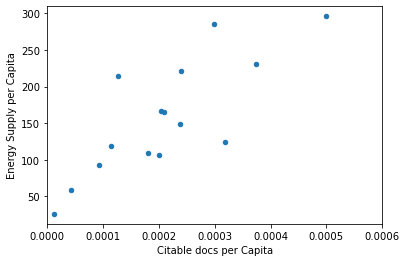

In [251]:
plot9()

In [255]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [268]:
df = answer_one()
median = df['% Renewable'].median()
def bival(x):
    if x >= median: return 1 
    else: return 0
df['HighRenew'] = df['% Renewable'].apply(lambda x: bival(x))
df['HighRenew']

China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [269]:
def answer_ten():
    df = answer_one()
    median = df['% Renewable'].median()
    def bival(x):
        if x >= median: return 1 
        else: return 0
    df['HighRenew'] = df['% Renewable'].apply(lambda x: bival(x))
    return df['HighRenew']
    raise NotImplementedError()

In [270]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [280]:
Top15 = answer_one()
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}
groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
Top15['Estimate Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
for group, frame in Top15.groupby(ContinentDict):
    groups.loc[group] = [len(frame), frame['Estimate Population'].sum(),frame['Estimate Population'].mean(),frame['Estimate Population'].std()]


In [276]:
def answer_eleven():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    Top15['Estimate Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    for group, frame in Top15.groupby(ContinentDict):
        groups.loc[group] = [len(frame), frame['Estimate Population'].sum(),frame['Estimate Population'].mean(),frame['Estimate Population'].std()]
    return groups
    raise NotImplementedError()

In [277]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [323]:
df = answer_one()
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}
df["bins"] = pd.cut(df["% Renewable"], 5)
ser = df.groupby([ContinentDict, df['bins']]).size()
ser.where(ser != 0).dropna(how='any').rename("Continent")


               bins            
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: Continent, dtype: float64

In [309]:
def answer_twelve():
    df = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df["bins"] = pd.cut(df["% Renewable"], 5)
    ser = df.groupby([ContinentDict, df['bins']]).size()
    return ser.where(ser != 0).dropna(how='any')
    raise NotImplementedError()


In [319]:
answer_twelve()

               bins            
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
dtype: float64

In [310]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [315]:
df = answer_one()
df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['PopEst'].apply(lambda x: '{:,}'.format(x))

China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [316]:
def answer_thirteen():
    df = answer_one()
    df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
    return df['PopEst'].apply(lambda x: '{:,}'.format(x))
    raise NotImplementedError()

In [317]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [311]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


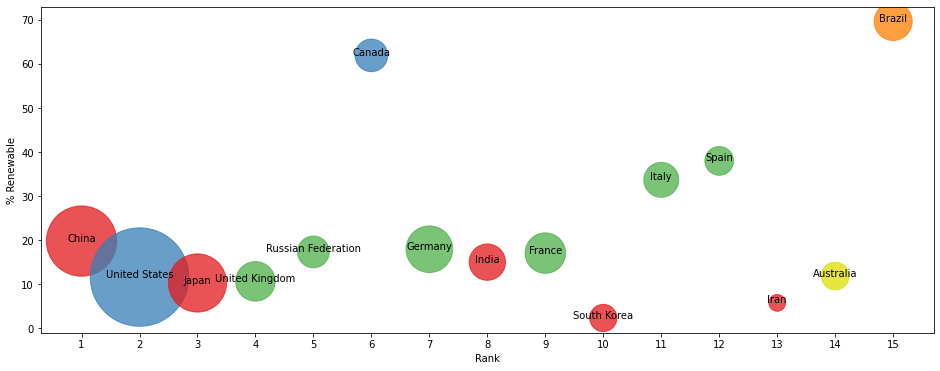

In [312]:
plot_optional()